<p>Introduction to Machine Learning (Spring 18) - Team 1
<p>Team Members: Anurag Marwah (Net ID: am8482)

# Initialize

In [1]:
import numpy as np
from scipy import misc
import time
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Step 0: Prepare Data

## Flickr API

In [2]:
import flickrapi
import urllib.request
import skimage.io
import skimage.transform
import requests
import warnings
import os
from io import BytesIO

In [3]:
api_key = u'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
api_secret = u'xxxxxxxxxxxxxxxx'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [4]:
def createdir(dir_name):
    dir_exists = os.path.isdir(dir_name)
    if not dir_exists:
        os.mkdir(dir_name)
        print("Making directory %s" % dir_name)
    else:
        print("Directory %s already present!" % dir_name)

In [5]:
def downloadimages(dir_name,keyword,nimage):

    photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                         sort='relevance',per_page=100)
#     nimage = 10
    i = 0
    nrow = 224
    ncol = 224
    for photo in photos:
        url=photo.get('url_c')
        if not (url is None):

            # Create a file from the URL
            # This may only work in Python3
            response = requests.get(url)
            file = BytesIO(response.content)

            # Read image from file
            im = skimage.io.imread(file)

            # Resize images
            im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')

            # Convert to uint8, suppress the warning about the precision loss
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                im2 = skimage.img_as_ubyte(im1)

            # Save the image
            local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format(dir_name,keyword,keyword, i)  
            skimage.io.imsave(local_name, im2)      
            print(local_name)
            i = i + 1        
        if (i >= nimage):        
            break        

## Creating Directories

In [6]:
dir1 = 'train'
dir2 = 'test'
keyword1 = 'person'
keyword2 = 'car'
keyword3 = 'animal'
keyword4 = 'bird'
keyword5 = 'building'
keyword6 = 'tree'
keyword7 = 'face'
keyword8 = 'group'

In [7]:
# createdir(dir1)
# createdir(dir1+'/'+keyword1)
# createdir(dir1+'/'+keyword2)
# createdir(dir1+'/'+keyword3)
# createdir(dir1+'/'+keyword4)
# createdir(dir1+'/'+keyword5)
# createdir(dir1+'/'+keyword6)
# createdir(dir1+'/'+keyword7)
# createdir(dir2)
# createdir(dir2+'/'+keyword1)
# createdir(dir2+'/'+keyword2)
# createdir(dir2+'/'+keyword3)
# createdir(dir2+'/'+keyword4)
# createdir(dir2+'/'+keyword5)
# createdir(dir2+'/'+keyword6)
# createdir(dir2+'/'+keyword7)
# createdir(dir2+'/'+keyword8)

## Download Data

In [8]:
# downloadimages(dir1,keyword1,1000)
# downloadimages(dir1,keyword2,1000)
# downloadimages(dir1,keyword3,1000)
# downloadimages(dir1,keyword4,1000)
# downloadimages(dir1,keyword5,1000)
# downloadimages(dir1,keyword6,1000)
# downloadimages(dir1,keyword7,1000)

# downloadimages(dir2,keyword1,300)
# downloadimages(dir2,keyword2,300)
# downloadimages(dir2,keyword3,300)
# downloadimages(dir2,keyword4,300)
# downloadimages(dir2,keyword5,300)
# downloadimages(dir2,keyword6,300)
# downloadimages(dir2,keyword7,300)
# downloadimages(dir2,keyword8,300)

# Step 1: Download Model

In [9]:
import keras

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [11]:
import keras.backend as K
K.clear_session()

In [12]:
nrow = 64
ncol = 64
nchan = 3
image_shape = (nrow,ncol,3)
print(image_shape)

(64, 64, 3)


## Download VGGNet

In [13]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions, preprocess_input
base_model = VGG16(include_top=False, weights='imagenet', input_shape=image_shape)
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

## Create New Model

In [14]:
# Create new model
model = Sequential()

# Add layers into the new model
for layer in base_model.layers:
    model.add(layer)

# Freeze the layers in the new model
for layer in model.layers:
    layer.trainable=False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [15]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

# Step 2: Train Model

## Data Generators

In [16]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        classes=['notaface','face'],
                        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [17]:
test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        classes=['notaface','face'],
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

## Sample Train and Test Data

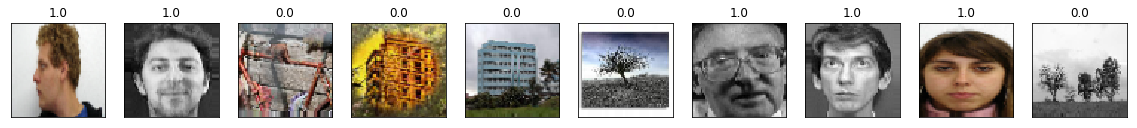

In [19]:
nplot = 10
plt.figure(figsize=(20,20))
minibatch_x,minibatch_y = train_generator.next()
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(minibatch_x[i])
    plt.title(minibatch_y[i])

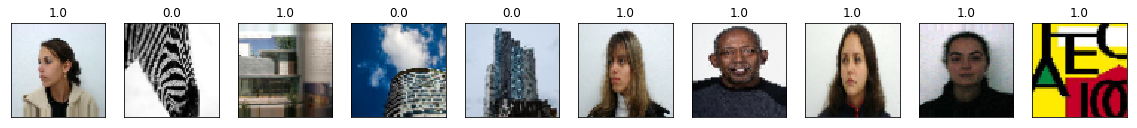

In [20]:
nplot = 10
plt.figure(figsize=(20,20))
minibatch_x,minibatch_y = test_generator.next()
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    disp_image(minibatch_x[i])
    plt.title(minibatch_y[i])

## Model Training

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.adam(lr=1e-3),
              metrics=['accuracy'])

In [22]:
steps_per_epoch = train_generator.n // batch_size 
validation_steps = test_generator.n // batch_size

In [23]:
nepochs = 5  # Number of epochs

# Call the fit_generator function
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)

Epoch 1/5
125/125 [==============================] - 320s 3s/step - loss: 0.0447 - acc: 0.9818 - val_loss: 1.1165 - val_acc: 0.8604
Epoch 2/5
125/125 [==============================] - 327s 3s/step - loss: 0.0073 - acc: 0.9982 - val_loss: 1.5078 - val_acc: 0.8463
Epoch 3/5
125/125 [==============================] - 316s 3s/step - loss: 0.0117 - acc: 0.9955 - val_loss: 1.2998 - val_acc: 0.8644
Epoch 4/5
125/125 [==============================] - 324s 3s/step - loss: 0.0033 - acc: 0.9985 - val_loss: 1.5370 - val_acc: 0.8523
Epoch 5/5
125/125 [==============================] - 327s 3s/step - loss: 0.0046 - acc: 0.9982 - val_loss: 1.8904 - val_acc: 0.8407


## Training Accuracy vs Validation Accuracy - Plot

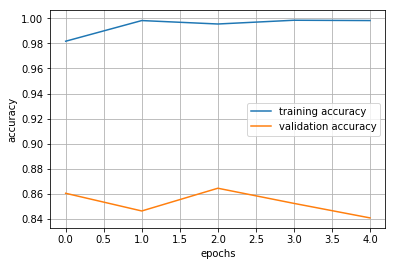

In [24]:
# Plot the training accuracy and validation accuracy curves on the same figure.
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])

# Step 3: Predict Faces

In [25]:
from skimage.transform import pyramid_gaussian

In [26]:
import matplotlib.patches as patches

## Sliding Window

In [27]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [28]:
# Display the image
def disp_image2(ax,im):
    if (len(im.shape) == 2):
        # Gray scale image
        ax.imshow(im, cmap='gray')    
    else:
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        ax.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

## Face Prediction

In [32]:
def predict_face(model,im,scale_factor,winW,winH,step,threshold):
    
    # Build Image Pyramid 
    pyramid = tuple(pyramid_gaussian(im, downscale=scale_factor))

    # Calculate the number of images to be used from the image pyramid
    for pyramid_count,p in enumerate(pyramid):
        # if the image is too small, break from the loop
        if p.shape[0] < 64 or p.shape[1] < 64:
            break

    # Build Image Plot
    fig,ax = plt.subplots(1)
    disp_image2(ax,im)

    # Iterate over the Image Pyramid
    for j in range(pyramid_count):
        p = pyramid[j]

        # Get windows
        i=0
        x_win = ((int)((p.shape[1]-winW)/step))+1
        y_win = ((int)((p.shape[0]-winH)/step))+1
        num_boxes = x_win * y_win
        box = np.zeros((num_boxes,2))
        win_arr = np.zeros((num_boxes,winW,winH,3))

        # Iterate over the Sliding Windows
        for (x, y, window) in sliding_window(p, stepSize=step, \
                                             windowSize=(winW, winH)):

            # if the window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue

            # Get windows in an array
            win_arr[i] = window
            box[i] = x,y
            i = i + 1

        # Use VGG-Net for Image Class Prediction
        ntest = win_arr.shape[0]
        yhat = model.predict(win_arr)
        yhat_bin = (yhat>threshold).reshape(ntest).astype(int)

        # Print Boxes
        for k,c in enumerate(box):
            if yhat_bin[k]==1:
                rect = patches.Rectangle((box[k,0],box[k,1]),\
                                         winW*(np.power(scale_factor,j)),\
                                         winH*(np.power(scale_factor,j)),\
                                         fill=False,ls='solid',lw=1,color='b')
                ax.add_patch(rect)

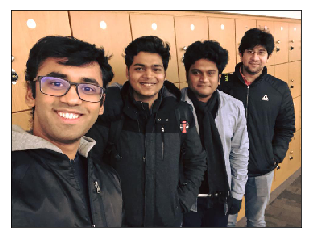

In [30]:
im_w = 360
im_h = 270
im_shape = (im_h,im_w,3)
im = np.zeros(im_shape)
class_name = 'group'
fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(class_name,class_name,3)
im[:,:,:] = image.load_img(fn, target_size=(im_h, im_w))
disp_image(im)

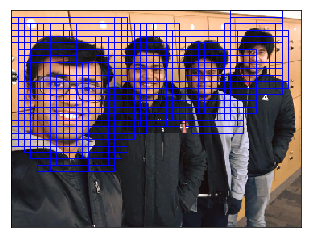

In [33]:
predict_face(model,im,scale_factor = 2,winW = 64,winH = 64,step = 8,threshold = 0.5)